# HackEDU Machine Learning and Data Science for Chemical Biology - Lecture 1 - Nov 4th 2019

Taught by Nathan Barlow: nathan.barlow@imperial.ac.uk
TAs: Rob Strutt and Hisham Abdel Aty: r.strutt17@imperial.ac.uk , hisham.abdel-aty15@imperial.ac.uk 

## Topics covered in the 5 lessons:
1. Data visualization and the basics of data science
2. Classification
3. Clustering
4. Regression
5. Dimensionality reduction
6. Applications to chemical biology


## Topics for Today: 
1. Defining terms and course goals (10 mins)
2. Course Prep: python installation, environments and packages
3. Review of the basics: Importing, plotting, and visualizing data (7 mins)
4. Knowing when to apply the right model (2 minutes)
5. Bayesian statistics (10 minutes)
6. Model error (15 minutes)
7. Handling non-numeric data (10 minutes)
8. 1 hour lab practical

# 1 . Defining Terms and Course Goals

basic understanding of tools and technology of data science and machine learning.

familiarity with python and jupyter notebooks

learn to read documentation and install useful python packages

know what is available and when to apply these tools appropriately

awareness of how the future of chemical biology will be shaped by modern statistical techniques

* 1-hour practical session designed to help you on the final exam






## Assessment

There will be a 1-hour final exam at the end of the course. It will consist of 5 question covering:

1. Data Visualisation
2. Linear Regression and Making Predictions
3. Dimesionality Reduction and Principle Component Analysis
4. Clustering and Unsupervised Learning
5. Modelling

There will be a mock exam given as well to help you prepare.

## Data Science, Machine Learning, Aritifical Intelligence

The field is still developing so no strict definitions yet...
[ref](https://towardsdatascience.com/clearing-the-confusion-ai-vs-machine-learning-vs-deep-learning-differences-fce69b21d5eb)


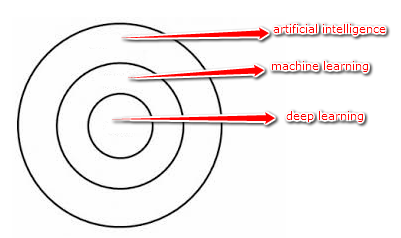

In [2]:
from IPython.display import Image
Image("aimldl.png")

* General vs Narrow AI
* Machine learning vs statistics (computing vs formal math)
* Deep learning - number of neural network layers

## We will focus on machine learning quadrants:

* Classification
* Regression
* Clustering
* Dimensionality Reduction

### Note that these can be categorical and continuous data!

This all becomes clear once you start to try using the techniques!

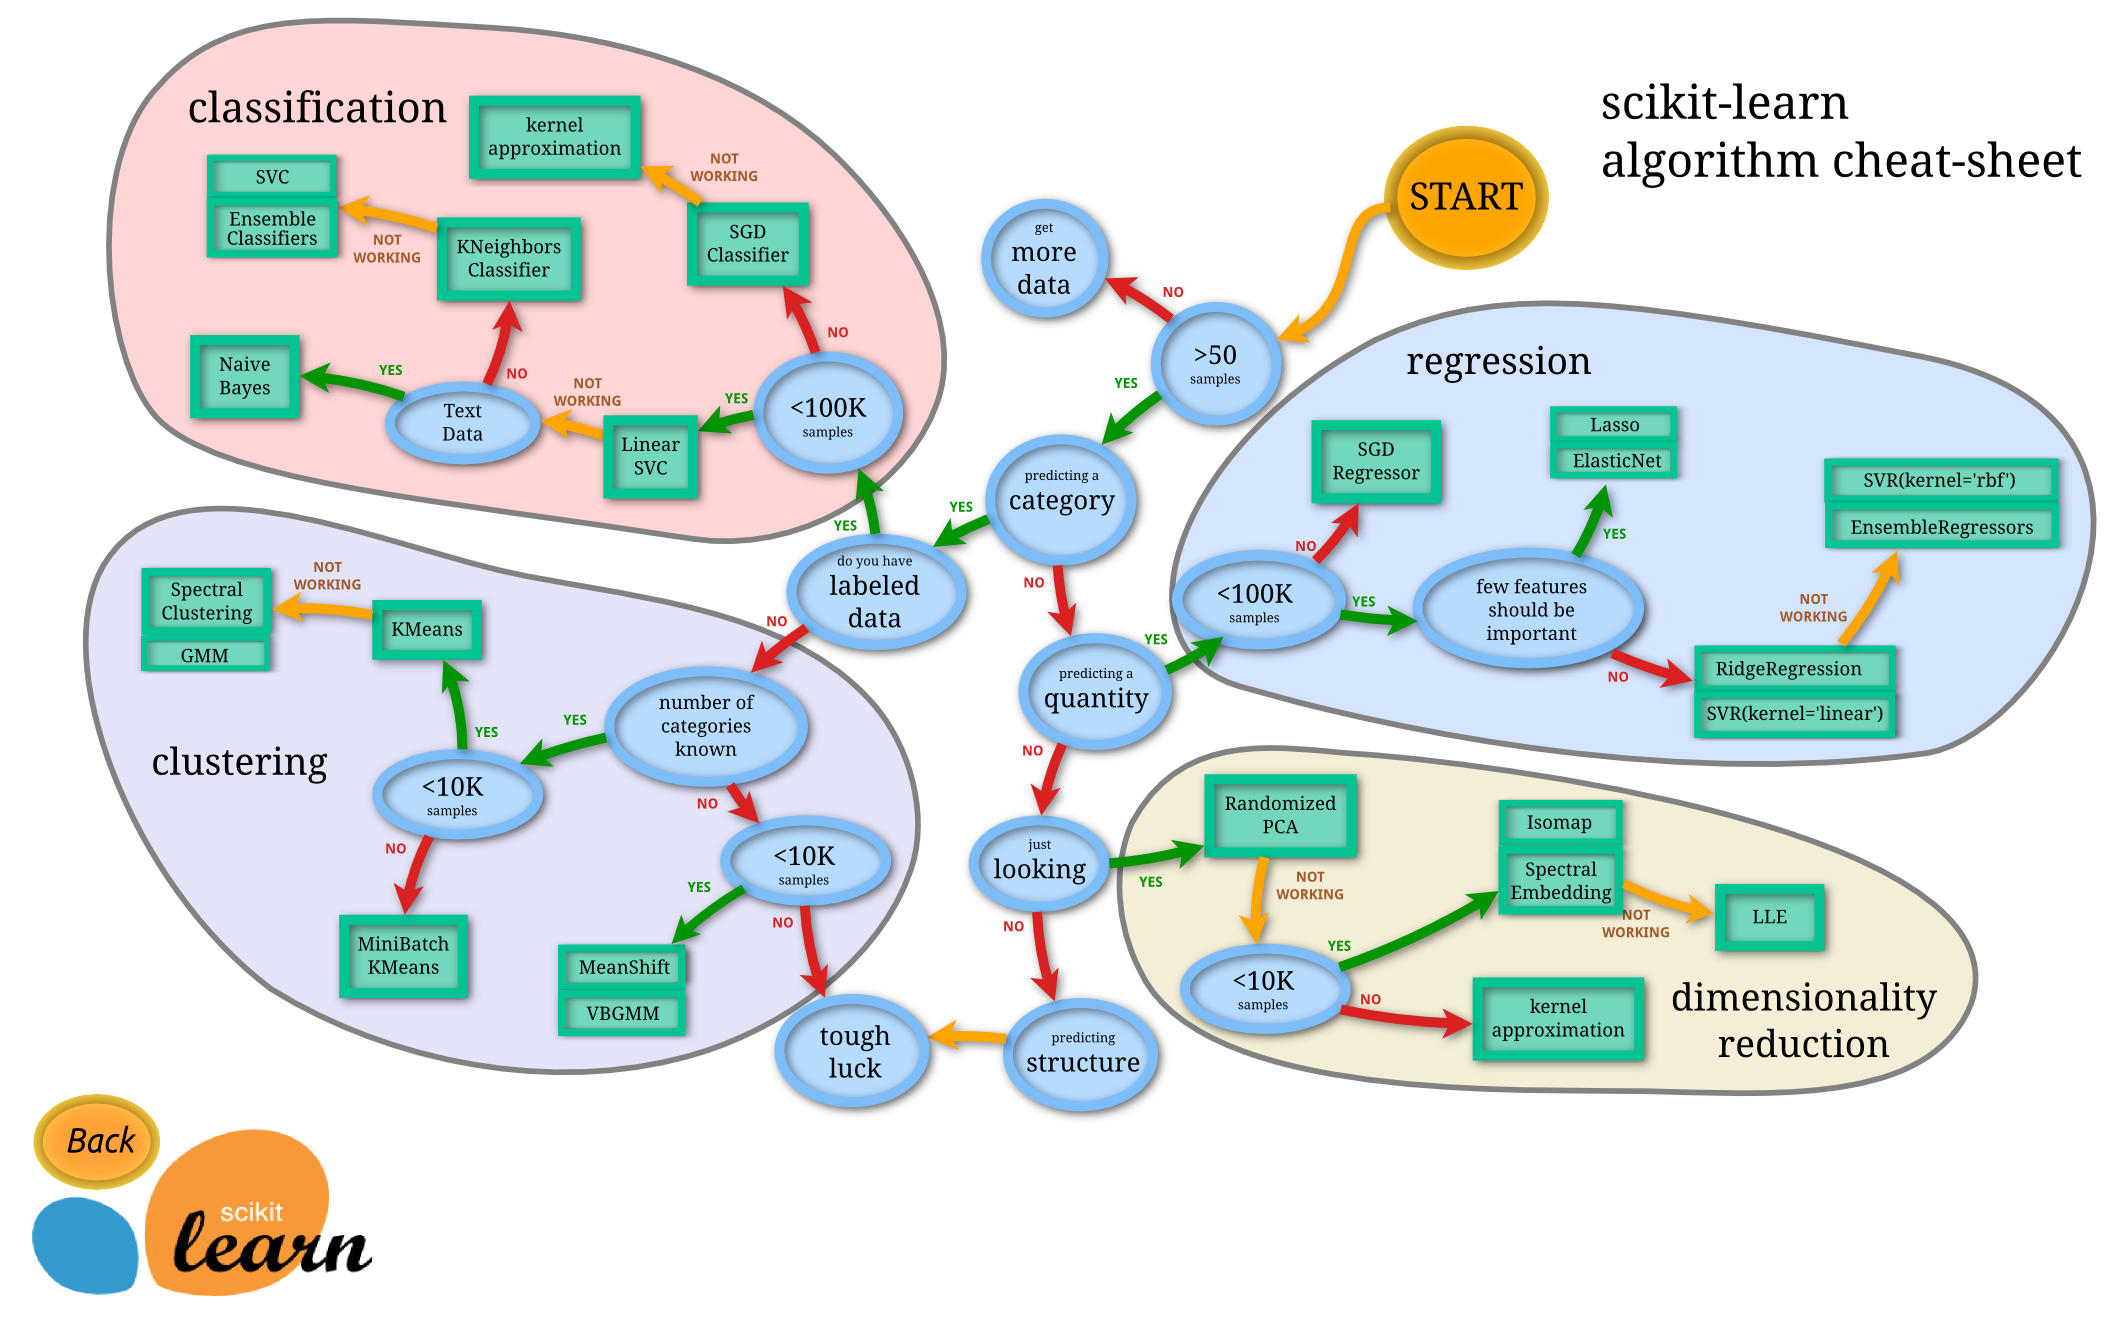

In [3]:
Image("ml_map.png")

## Supervised ---------- Unsupervised ---------- Both
    Regression
    Suppor Vector Machine
    Gradient Descent
    Gaussian Process
    Naive Bayes
    Decsion Trees
                        k-Means Clustering
                        Manifold Learning
                        Gaussian Mixture
                        Density Estimation
                        Covariance Estimation
                                                     Neural Networks
                                                     Nearest Neighbors




## Motivation

* messy, complex and high dimensional data (if you crash excel > million rows)
* insights and predictions that are not obvious by standard analysis
* a better understanding of the underlying statistics helps to prevent mistakes

## Recommended reading and materials

Python Machine Learning (2nd) by Sebastian Raschka

LinkedIn Learning (Free as student)
* Python Essential Training
* Python for Data Science Essential Training
* (very long list)

# 2 . Course Prep: python installation, environments and packages

In [4]:
# quick review of conda installs and environments

## Reading Documentaion

You will be using lots of installed packages that have classes you can use to perform a process. Without going into depth on Object Oriented Programming, we will discuss what you need to know to use these packages. The documentation tells you:

1. Parameters: These are the *initial values* you give the class required to run code.

2. Attributes: Associated with the class itself, not just any individual instance of the class.

3. Methods: Any of the class (object) specific functions.

4. Returns: What the class (object) spits out at the end.

Some examples:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame

# 3. Review of the basics: Importing, plotting, and visualizing data

In [5]:
# importing packages

import matplotlib.pyplot as plt
import numpy as np

In [6]:
# opening data

data = np.load('simpledata.npy')

In [7]:
# exploring data

data.shape

(2, 100)

In [8]:
#https://medium.com/@meghamohan/mutable-and-immutable-side-of-python-c2145cf72747
# Python objects and collections:
#list
test = [1,2,3,1,2,3]
print(f'list {test}')
#array
print(f'array {np.array(test)}')
#sets
print(f'set {set(test)}')
#tuples (not mutable)
print(f'tuple {tuple(test)}')
#dictionary
my_dictionary = {2:'me', 5:'you', 7:'them'}
print(f'dictionary: {my_dictionary[7]}' )


list [1, 2, 3, 1, 2, 3]
array [1 2 3 1 2 3]
set {1, 2, 3}
tuple (1, 2, 3, 1, 2, 3)
dictionary: them


In [9]:
# object type

print(type(data))
print(type(test))

<class 'numpy.ndarray'>
<class 'list'>


In [10]:
# data type (how it's stored in memory)

# with numpy we can call:
print(data.dtype)

# also:
# integers, complex, string, boolean etc

float64


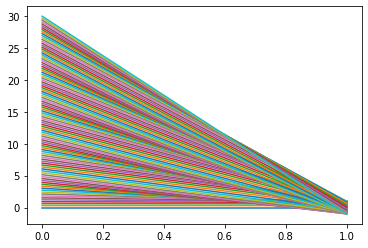

In [11]:
# we can plot this!

# naively....
plt.plot(data)

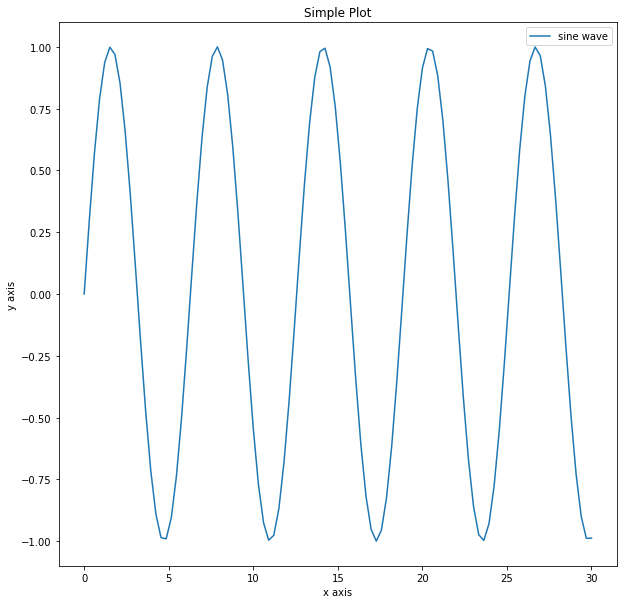

In [12]:
# knowing how the data is structured is helpful

# in numpy, data can be sliced with [ , , ]

# reading documentation is half the battle
#https://docs.scipy.org/doc/numpy/user/quickstart.html
#https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
plt.figure(figsize=(10,10))
plt.plot(data[0,:], data[1,:], label='sine wave')
plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title('Simple Plot')

plt.legend()

plt.show()

## As a researcher, visualizing your data is fundamental. You will have to make logical and shrewd decisions on how to appropriately communicate your data clearly and in a way that doesn't obfuscate the result. 

# 4. Knowing when to apply the right model

It is not always wise to apply a linear fit to the data, as shown by the classic Anscombe's Quartet.

## **What do these four plots have in common?**

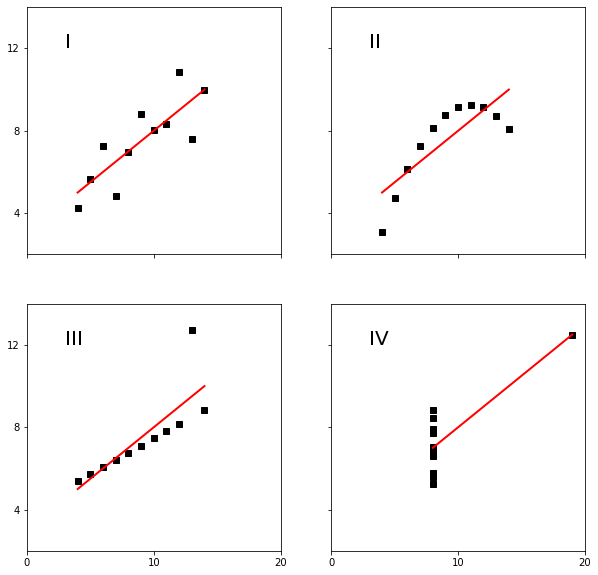

In [13]:

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]


def fit(x):
    return 3 + 0.5 * x


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

xfit = np.array([np.min(x), np.max(x)])
axs[0, 0].plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[0, 1].plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
axs[1, 0].plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
xfit = np.array([np.min(x4), np.max(x4)])
axs[1, 1].plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)

for ax, label in zip(axs.flat, ['I', 'II', 'III', 'IV']):
    ax.label_outer()
    ax.text(3, 12, label, fontsize=20)

plt.show()

In [14]:
# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


Takeaway: **Plot your data if you can!** and **Watch out for outliers!**

# 5. Bayesian statistics

(as opposed to frequentist statistics - where only repeatable events have probabilities)

Bayesian statistics deals with **Prior** data; for hypothesis A and data B:

#### $P(A|B)=P(B|A) \frac{P(A)}{P(B)}$

Where:

#### $P(B)= P(B|A)P(A)+P(B|notA)P(notA)$

### Bayes rule: $Posterior=\frac{Prior * Likelihood}{Evidence}$


#### Posterior 

$P(A|B)$

This is our goal!


#### Likelihood

$P(B|A)$

This is effectively what we will be changing!

"The likelihood for a hypothesis is the probability that you would have observed the data, if that hypothesis were true"


#### Prior

$P(A)$

How sure we are that A is true.

#### Evidence

$P(B)$

This is the data!

Also called *Marginal Likelihood*. "The probability that you would have observed the data, regardless if A is true."

## Simple example:

If a diagnosis for a given disease is 99% accurate, and 1% of the population have the disease. What are the odds you have the disease given that you test positive?

### Spend 3 minutes here and try to solve it....

-

-

-


-

-

-

-

-

-

-


-

-


## Answer:

let B = 'Test Positive' and A = 'Have the Disease'.

#### $P(A) = 0.01$

#### $P(notA) = 0.99$

#### $P(B|A) = 0.99$

#### $P(B|notA) = 0.01$

#### $P(B)= 0.99 x 0.01+0.01 x 0.99 = 0.0198$

#### $P(A|B)=0.99\frac{0.01}{0.99 x 0.01+0.01 x 0.99} = 0.50$

### Explanation

What is happening is you have a **Prior** probability of having the disease P(A) = 1%, and by updating the system with **Likelihood** and **marginal likelihood** information: that P(B|A) = 99% and P(B) = 1.98%, you have increased the chances of having the disease to 50%.

### Let's see this expanded out to a distribution for a general example:


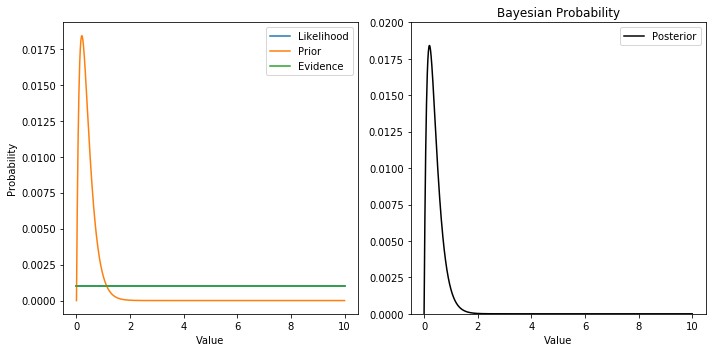

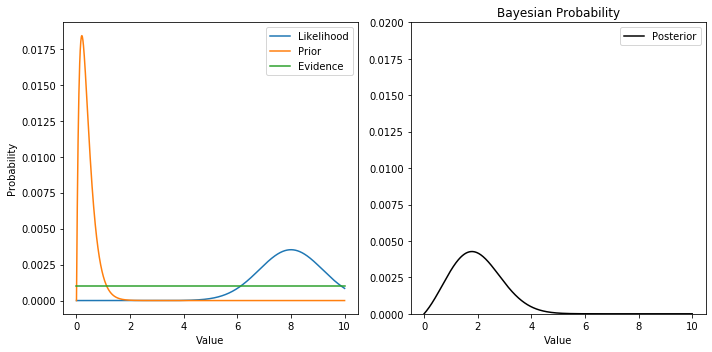

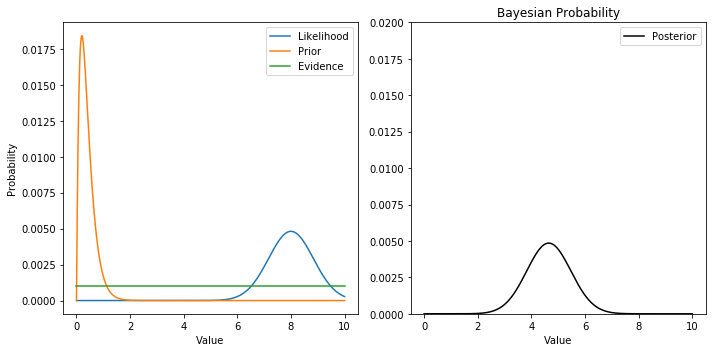

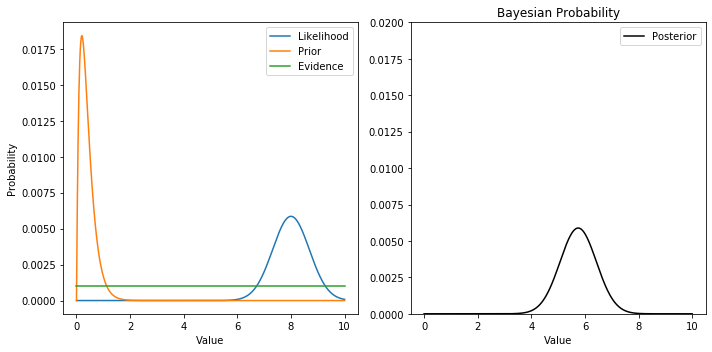

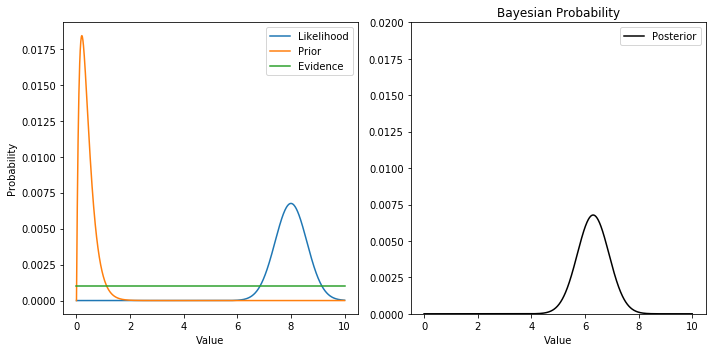

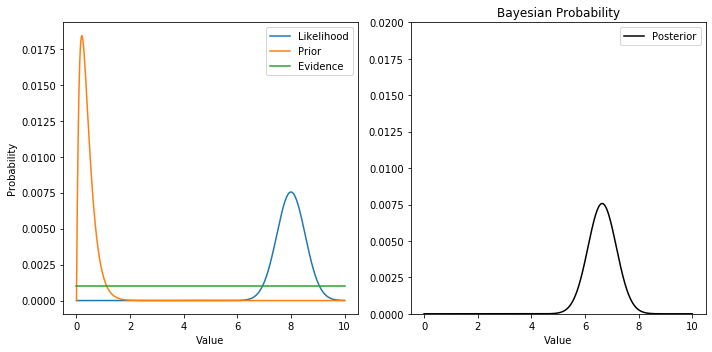

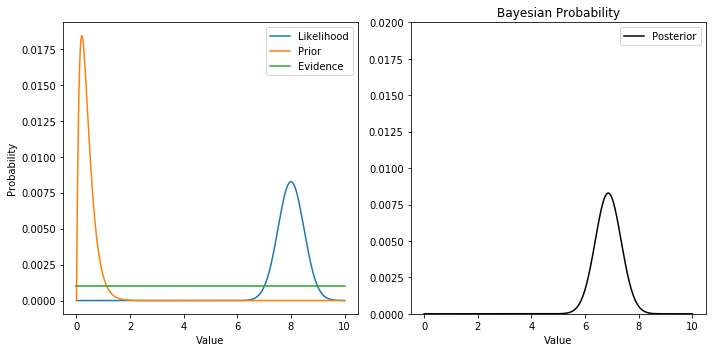

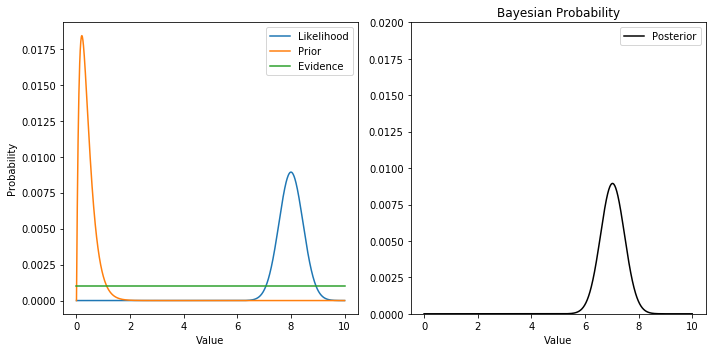

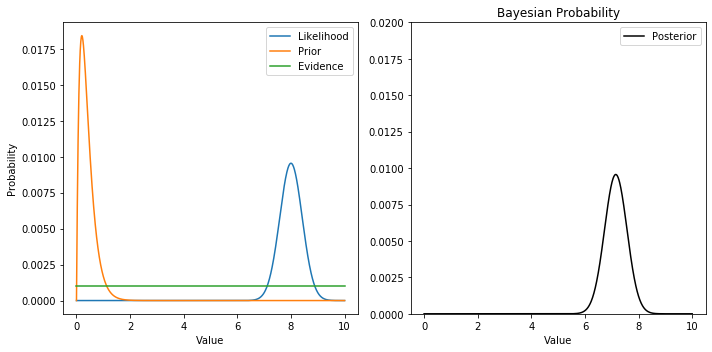

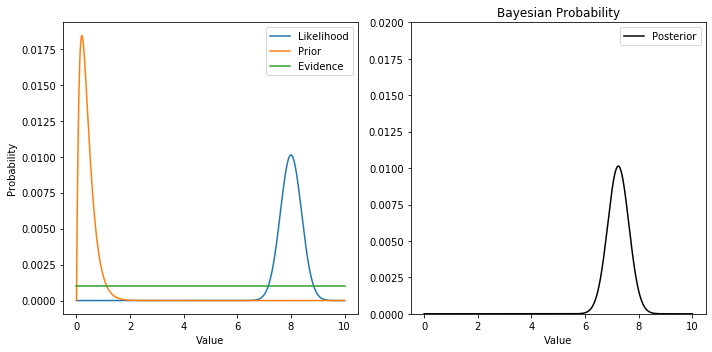

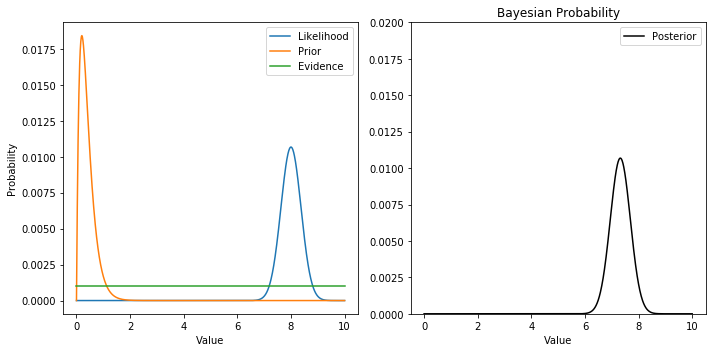

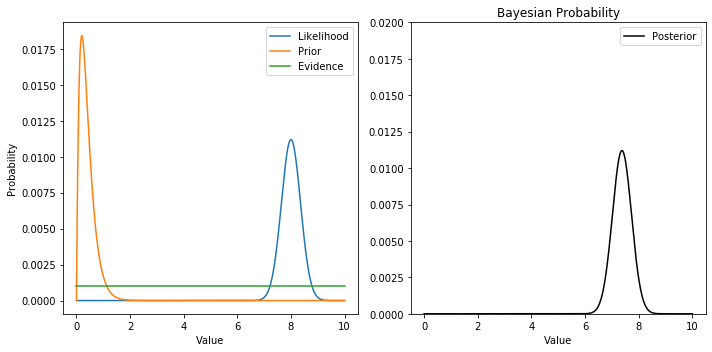

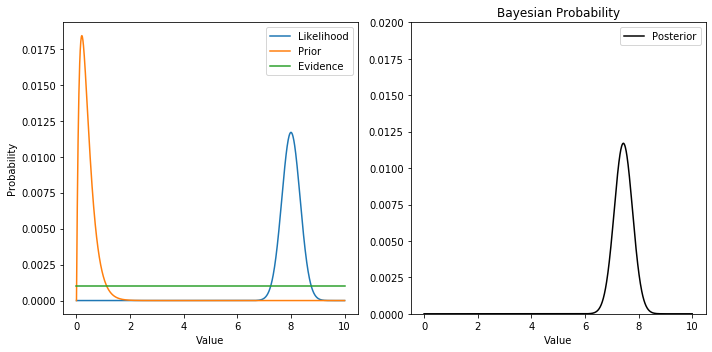

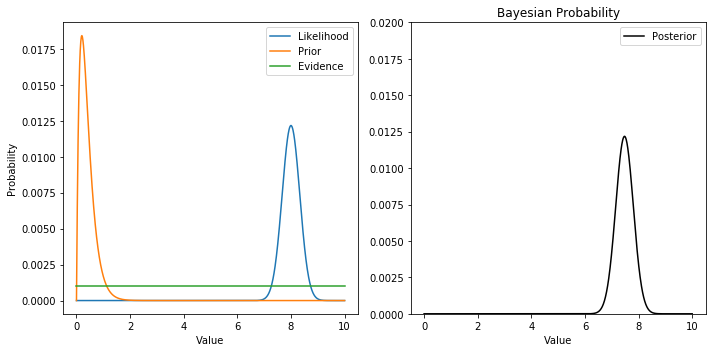

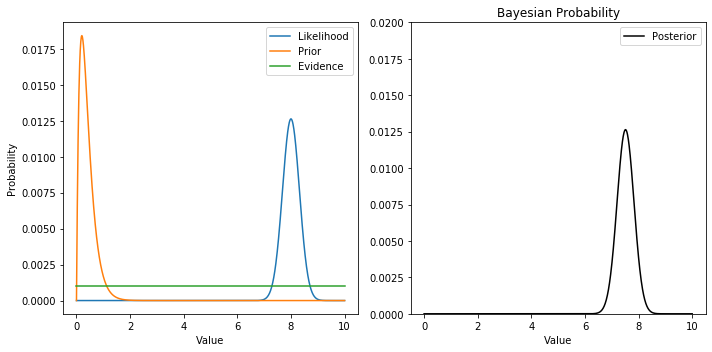

In [15]:
import math
lam = 5
k = 1


x = np.linspace(0,10,1000)
for i in np.linspace(0,5,15):
    # Prior
    #GAUSSIAN
    #A = np.exp(-3*(x-2)**2)
    #POISSSON
    A = (lam*x)**k*np.exp(-lam*x)/math.factorial(k)
    A = A/np.sum(A)

    # Evidence
    B = np.ones_like(x)
    #B = np.exp(-1*(x-2)**2)+1
    B = B/np.sum(B)

    # Likelihood
    # THIS IS CHANGING
    BA = np.exp(-i*(x-8)**2)
    BA = BA/np.sum(BA)

    # Posterior
    AB = A*BA/B
    AB = AB/np.sum(AB)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(x,BA, label='Likelihood')
    plt.plot(x,A, label='Prior')
    plt.plot(x,B, label='Evidence')
    plt.ylabel('Probability')
    plt.xlabel('Value')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(x,AB, 'k', label='Posterior')
    plt.legend()
    plt.title('Bayesian Probability')
    plt.xlabel('Value')
    plt.ylim(0,0.02)
    plt.tight_layout()
    plt.show()

In the first case, there is a uniform likelihood, so that posterior and priors are the same, but by increasing the accuracy of the likelihood, the posterial starts to shift.

# 6. Model error
## Classification error

There are 4 outcomes when you feed data into a **binary** classifier:

1. True Positive $TP$
2. False Positive $FP$
3. True Negative $TN$
4. False Negative $FN$

This will be addressed in future lessons. But keep in mind that these outcomes are important in consideration of how the model is built/optimized. For example, if you are searching for potential drug candidates, a False negative is a worse outcome than a False positive, as you might miss out on a very important active ingredient. 

Or imagine how ebola testing is modelled?

There are other important terminology to remember:

1. True Positive Rate (Recall or Sensitivity) $=\frac{TP}{TP+FN} $
2. False Positive Rate  $=\frac{FP}{TN+FP} $
3. Specificity $=\frac{TN}{TN+FP} $

## WATCH OUT!

#### You will find that TPR and FPR are also calculated at given thresholds when calculating the "ROC" plot.

Example with logistic function (decision fnction)

# $f(x) = \frac{1}{1+exp(\beta_0-\beta_1 x)}$

Text(0, 0.5, 'probability')

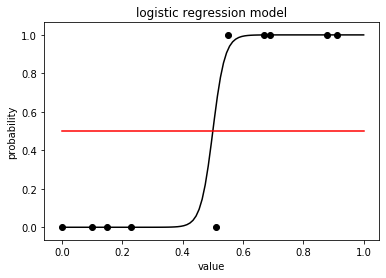

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score

# simple logistic regression example (funny that its called regression, but it really is a classifier)

def logistic_func(x):
    return 1/(1+np.exp(beta0-beta1*x))
X_data, y_data = [0, 0.1, 0.15, 0.23, 0.55, 0.51, 0.67, 0.69, 0.88, 0.91], [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
plt.scatter(X_data,y_data, color = 'k')
beta0 = 25
beta1 = 50
threshold = 0.5
x = np.linspace(0,1,100)
plt.plot(np.linspace(0,1,100), logistic_func(x), 'k')
plt.plot([0,1], [threshold, threshold], 'r')
plt.title('logistic regression model')
plt.xlabel('value')
plt.ylabel('probability')

In [22]:
# try new data
X_new = np.array([0.15, 0.29, 0.45, 0.46, 0.54, 0.6])
y_new_actual = np.array([0,0,1,0,1,1])
# decision function!
y_new_pred = (logistic_func(X_new)>threshold)*1
# confusion matrix
cm = confusion_matrix(y_new_pred, y_new_actual)
tn, fp, fn, tp = cm.ravel()
tpr = tp/(tp+fn)
fpr = fp/(tn+fp)
spec = tn/(tn+fp)
print(cm)
print(f"True positive: {tp}, False positive: {fp}, True negative: {tn}, False negative: {fn}")
print(f"True positive rate: {tpr}, False positive rate: {fpr}, specificity {spec}")

[[3 1]
 [0 2]]
True positive: 2, False positive: 1, True negative: 3, False negative: 0
True positive rate: 1.0, False positive rate: 0.25, specificity 0.75


## Reciever Operating Characteristic (ROC)
https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0

### Plotting Signal (TRP) vs Noise (FPR)

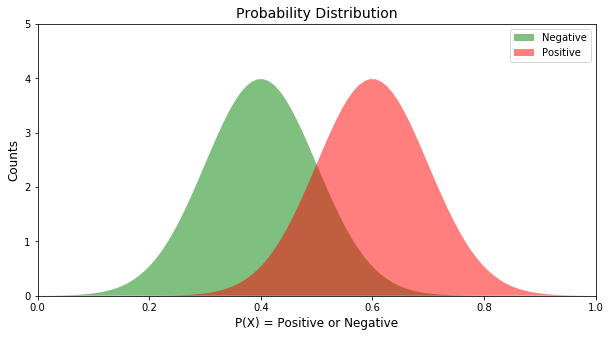

In [30]:
import numpy as np
from sklearn import metrics

def pdf(x, std, mean):
    const = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = const*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist

x = np.linspace(0, 1, num=100)
good_pdf = pdf(x,0.1,0.4)
bad_pdf = pdf(x,0.1,0.6)

def plot_pdf(good_pdf, bad_pdf, ax):
    ax.fill(x, good_pdf, "g", alpha=0.5)
    ax.fill(x, bad_pdf,"r", alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,5])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X) = Positive or Negative', fontsize=12)
    ax.legend(["Negative","Positive"])
    
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax)

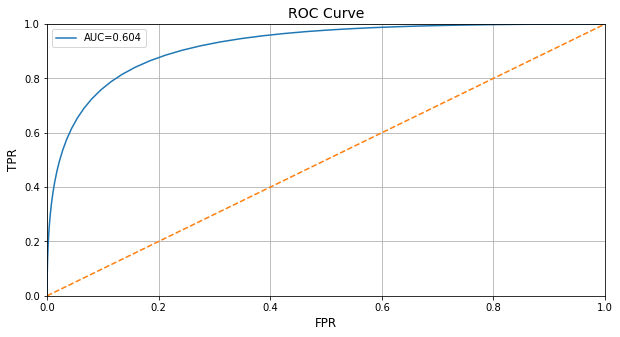

In [24]:
def plot_roc(good_pdf, bad_pdf, ax):
    #Total
    total_bad = np.sum(bad_pdf)
    total_good = np.sum(good_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0:
            cum_TP+=bad_pdf[len(x)-1-i]
            cum_FP+=good_pdf[len(x)-1-i]
        FPR=cum_FP/total_good
        TPR=cum_TP/total_bad
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 100 timesteps into account
    auc=np.sum(TPR_list)/100
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])
    
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_roc(good_pdf, bad_pdf, ax)


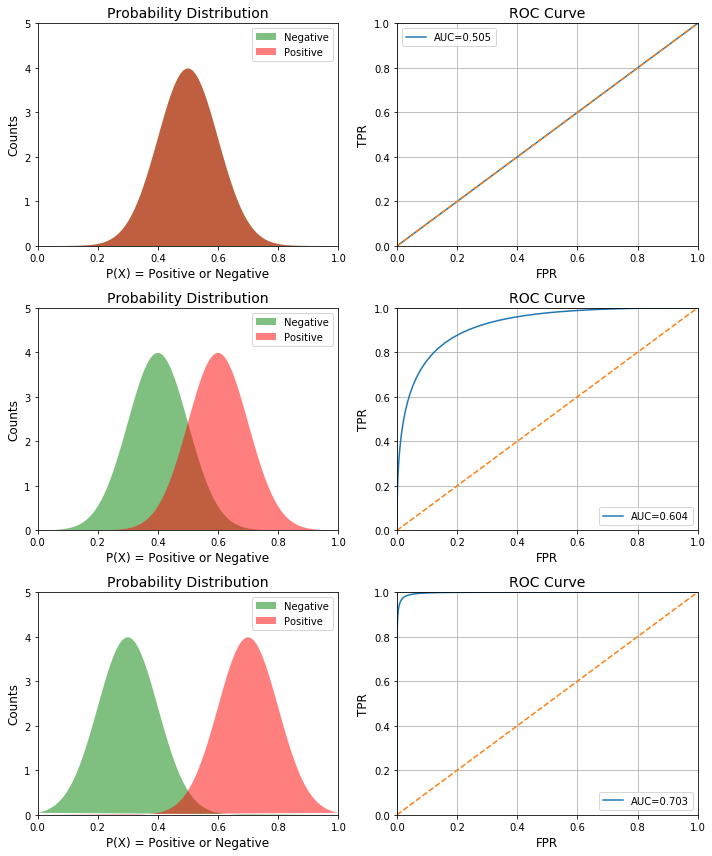

In [31]:
x = np.linspace(0, 1, num=100)
fig, ax = plt.subplots(3,2, figsize=(10,12))
means_tuples = [(0.5,0.5),(0.4,0.6),(0.3,0.7)]
i=0
for good_mean, bad_mean in means_tuples:
    good_pdf = pdf(x, 0.1, good_mean)
    bad_pdf  = pdf(x, 0.1, bad_mean)
    plot_pdf(good_pdf, bad_pdf, ax[i,0])
    plot_roc(good_pdf, bad_pdf, ax[i,1])
    i+=1
plt.tight_layout()

### Back to the previous example...

area under the curve: 0.888888888888889


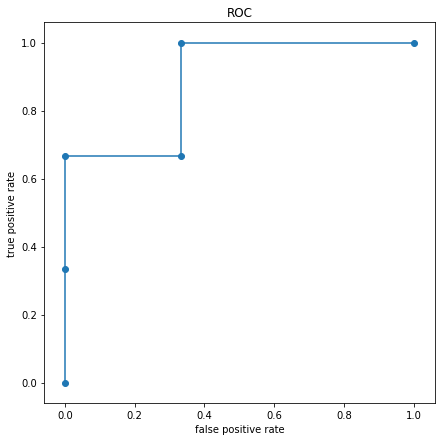

1.9933071490757153
0.9933071490757153
0.8807970779778823
0.11920292202211755
0.07585818002124355
2.5109990926928157e-08


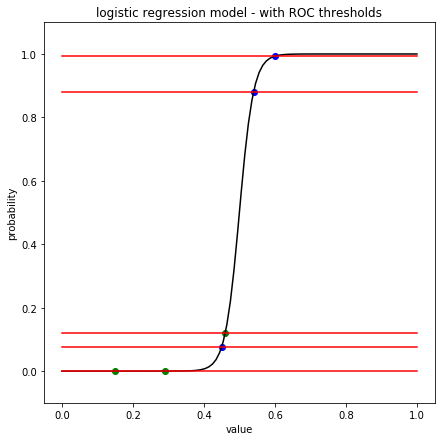

In [32]:
score = logistic_func(X_new)
#score = np.exp(beta0-beta1*X_new)
fpr, tpr, thresh = metrics.roc_curve(y_new_actual, score, drop_intermediate = True)
print(f"area under the curve: {metrics.auc(fpr, tpr)}")

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.scatter(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.show()

plt.figure(figsize=(7,7))
plt.title('logistic regression model - with ROC thresholds')
plt.xlabel('value')
plt.ylabel('probability')
plt.plot(np.linspace(0,1,100), logistic_func(x), 'k')
for xn,yn in zip(X_new, y_new_actual):
    if yn == 1:
        plt.scatter(xn, logistic_func(xn), c='b')
    else:
        plt.scatter(xn, logistic_func(xn), c='g')
    
for th in thresh:
    print(th)
    plt.plot([0,1], [th, th], 'r')
    
plt.ylim(-0.1,1.1)
plt.show()

# 7. Handling non-numeric data
If we are lucky the data is numeric, however you will find in chemical biology and chemistry that we are often stuck with an alphabet. This is a simple example, however often opening and cleaning the data is not always easy or straightforward.

You will do a bio-practical with Rudiger using bakers yeast. What if you are required to search the proteome of this species? You find the data but it is in a format you have not heard of? (fasta.gz)
https://www.uniprot.org/proteomes/UP000002311


The S. cerevisiae genome is about 12.2 Mb with 6,275 genes (16 chromosomes) 

Only about 5,800 of these genes are believed to be functional. 


You can use biopython to open UP000002311_559292.fasta.gz


First, conda install biopython:


"conda install -c conda-forge biopython"

and read the documentation:
https://biopython.org/DIST/docs/api/Bio.SeqIO-module.html

In [34]:
# lets test this out
import gzip
from Bio import SeqIO

In [35]:
count = 0

# Lets look at one protein sequence per gene (6049)
#python 'with' is useful!
with gzip.open("UP000002311_559292.fasta.gz", "rt") as handle:
    #Note that modes The mode argument can be any of 'r', 'rb', 'a', 'ab', 'w', 'wb', 'x' or 
    #'xb' for binary mode, or 'rt', 'at', 'wt', or 'xt' for text mode. The default is 'rb'
    #https://docs.python.org/3/library/functions.html#open
    #https://docs.python.org/3/library/gzip.html
    
    #for each line (record) in the 'fasta' file
    for record in SeqIO.parse(handle, "fasta"):
        count+=1
        print(record.id)
print(count)

sp|A0A023PYF4|YE145_YEAST
sp|A0A023PZB3|FMP49_YEAST
sp|A0A023PZE8|YD57W_YEAST
sp|A0A023PZF2|YE009_YEAST
sp|A0A023PZG4|YL236_YEAST
sp|A0A0B7P221|RDT1_YEAST
sp|A0A0B7P3V8|YP41B_YEAST
sp|A2P2R3|YM084_YEAST
sp|A5Z2X5|YP010_YEAST
sp|D6VPM8|YAJ3_YEAST
sp|D6VTK4|STE2_YEAST
sp|D6W196|CMC1_YEAST
sp|I2HB52|YB56A_YEAST
sp|I2HB70|YM16A_YEAST
sp|O13297|CET1_YEAST
sp|O13329|FOB1_YEAST
sp|O13511|YA065_YEAST
sp|O13512|YA64B_YEAST
sp|O13516|RS9A_YEAST
sp|O13525|COQ4_YEAST
sp|O13527|YA11B_YEAST
sp|O13529|ECM12_YEAST
sp|O13535|YH11B_YEAST
sp|O13536|YH139_YEAST
sp|O13539|THP2_YEAST
sp|O13544|YL302_YEAST
sp|O13547|CCW14_YEAST
sp|O13549|VPS63_YEAST
sp|O13555|JIP3_YEAST
sp|O13556|YL462_YEAST
sp|O13559|YRF14_YEAST
sp|O13563|RPN13_YEAST
sp|O13565|YL358_YEAST
sp|O13574|YL255_YEAST
sp|O13577|DIF1_YEAST
sp|O13578|YL415_YEAST
sp|O13585|YP089_YEAST
sp|O13587|YP096_YEAST
sp|O14455|RL36B_YEAST
sp|O14464|RTC6_YEAST
sp|O14467|MBF1_YEAST
sp|O14468|YO304_YEAST
sp|O43137|YB085_YEAST
sp|O60200|MDM35_YEAST
sp|O74302|YD13A_Y

sp|P34241|URB1_YEAST
sp|P34243|HCS1_YEAST
sp|P34244|HSL1_YEAST
sp|P34245|YKJ7_YEAST
sp|P34246|MTC2_YEAST
sp|P34247|UTP11_YEAST
sp|P34248|YKK0_YEAST
sp|P34249|YKK2_YEAST
sp|P34250|SEG2_YEAST
sp|P34251|YKK7_YEAST
sp|P34252|SLD2_YEAST
sp|P34253|KTI12_YEAST
sp|P34730|BMH2_YEAST
sp|P34756|FAB1_YEAST
sp|P34758|SCD5_YEAST
sp|P34760|TSA1_YEAST
sp|P34761|WHI3_YEAST
sp|P34909|NOT4_YEAST
sp|P35056|PEX5_YEAST
sp|P35127|UBL1_YEAST
sp|P35169|TOR1_YEAST
sp|P35172|TREB_YEAST
sp|P35176|CYPD_YEAST
sp|P35177|SPT7_YEAST
sp|P35178|RRP1_YEAST
sp|P35179|SC61G_YEAST
sp|P35180|TOM20_YEAST
sp|P35181|AP1S1_YEAST
sp|P35182|PP2C1_YEAST
sp|P35183|AST1_YEAST
sp|P35184|SQT1_YEAST
sp|P35187|SGS1_YEAST
sp|P35189|TAF14_YEAST
sp|P35190|CLG1_YEAST
sp|P35191|MDJ1_YEAST
sp|P35192|MAC1_YEAST
sp|P35193|ATG19_YEAST
sp|P35194|UTP20_YEAST
sp|P35195|ECM15_YEAST
sp|P35196|RER2_YEAST
sp|P35197|GCS1_YEAST
sp|P35198|MTH1_YEAST
sp|P35200|UPS2_YEAST
sp|P35201|CENPC_YEAST
sp|P35202|THI80_YEAST
sp|P35203|CBF3C_YEAST
sp|P35206|CSG2_YEAST


sp|P43682|SFT1_YEAST
sp|P45818|ROK1_YEAST
sp|P45819|SPO74_YEAST
sp|P45820|HUR1_YEAST
sp|P45976|FIP1_YEAST
sp|P45978|SCD6_YEAST
sp|P46151|MTHR1_YEAST
sp|P46367|ALDH4_YEAST
sp|P46654|RSSA2_YEAST
sp|P46655|SYEC_YEAST
sp|P46669|RPA43_YEAST
sp|P46670|TBCC_YEAST
sp|P46671|FAR3_YEAST
sp|P46672|ARC1_YEAST
sp|P46673|NUP85_YEAST
sp|P46674|SAC3_YEAST
sp|P46675|STU2_YEAST
sp|P46676|SUM1_YEAST
sp|P46677|TAF1_YEAST
sp|P46678|TFC5_YEAST
sp|P46679|STB2_YEAST
sp|P46680|AIP1_YEAST
sp|P46681|DLD2_YEAST
sp|P46682|AP3B_YEAST
sp|P46683|YAR1_YEAST
sp|P46784|RS10B_YEAST
sp|P46943|GUF1_YEAST
sp|P46944|TRS85_YEAST
sp|P46945|YGS6_YEAST
sp|P46946|COM1_YEAST
sp|P46947|CWC26_YEAST
sp|P46948|RRP41_YEAST
sp|P46949|FYV8_YEAST
sp|P46950|SNG1_YEAST
sp|P46951|YPP1_YEAST
sp|P46954|SIP4_YEAST
sp|P46955|NCA3_YEAST
sp|P46956|PHO86_YEAST
sp|P46957|DPOD2_YEAST
sp|P46958|IDS2_YEAST
sp|P46959|TRM61_YEAST
sp|P46961|GPI2_YEAST
sp|P46962|CTK2_YEAST
sp|P46963|CTK3_YEAST
sp|P46964|OST2_YEAST
sp|P46965|SPC1_YEAST
sp|P46969|RPE_YEAST
s

sp|Q06163|TERT_YEAST
sp|Q06164|MMS22_YEAST
sp|Q06168|SFH1_YEAST
sp|Q06169|PEX30_YEAST
sp|Q06170|YL326_YEAST
sp|Q06177|TMA10_YEAST
sp|Q06178|NMA1_YEAST
sp|Q06179|FMP27_YEAST
sp|Q06188|YL455_YEAST
sp|Q06199|YL456_YEAST
sp|Q06200|ECM7_YEAST
sp|Q06201|GMC2_YEAST
sp|Q06204|YL446_YEAST
sp|Q06205|FKBP4_YEAST
sp|Q06208|RIF2_YEAST
sp|Q06211|MMS1_YEAST
sp|Q06213|MED10_YEAST
sp|Q06214|JIP5_YEAST
sp|Q06216|PIG1_YEAST
sp|Q06217|SMD2_YEAST
sp|Q06218|DBP9_YEAST
sp|Q06224|YSH1_YEAST
sp|Q06235|YL162_YEAST
sp|Q06236|SHH4_YEAST
sp|Q06244|PUS5_YEAST
sp|Q06245|SEC10_YEAST
sp|Q06247|YL173_YEAST
sp|Q06251|YL177_YEAST
sp|Q06252|YL179_YEAST
sp|Q06263|VTA1_YEAST
sp|Q06266|TOS4_YEAST
sp|Q06287|NEP1_YEAST
sp|Q06315|SKG3_YEAST
sp|Q06321|ATG26_YEAST
sp|Q06324|MMR1_YEAST
sp|Q06325|YPS7_YEAST
sp|Q06328|YPQ2_YEAST
sp|Q06333|BL1S4_YEAST
sp|Q06336|GGA1_YEAST
sp|Q06337|EAF1_YEAST
sp|Q06338|BCP1_YEAST
sp|Q06339|TFC6_YEAST
sp|Q06340|ESC2_YEAST
sp|Q06344|ESF1_YEAST
sp|Q06346|KEI1_YEAST
sp|Q06349|DXO1_YEAST
sp|Q06350|CHI2_YE

## lets looks at some specific sequences

In [36]:
#look at a specific proteome component
#this is unzipped, we can grab this directly
file_name = r"uniprot-proteome_UP000002311+AND+proteomecomponent_Mitochondrion.fasta"
seq_store = []
id_store = []
for record in SeqIO.parse(file_name, 'fasta'):
    print(record.id, record.seq, '\n')
    seq_store.append(str(record.seq))
    id_store.append(record.id)

sp|P03876|AI2M_YEAST MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQYLHGNSQLFNVLVVGHAVLMIFCAPFRLIYHCIEVLIDKHISVYSINENFTVSFWFWLLVVTYMVFRYVNHMAYPVGANSTGTMACHKSAGVKQPAQGKNCPMARLTNSCKECLGFSLTPSHLGIVIHAYVLEEEVHELTKNESLALSKSWHLEGCTSSNGKLRNTGLSERGNPGDNGVFMVPKFNLNKVRYFSTLSKLNARKEDSLAYLTKINTTDFSELNKLMENNHNKTETINTRILKLMSDIRMLLIAYNKIKSKKGNMSKGSNNITLDGINISYLNKLSKDINTNMFKFSPVRRVEIPKTSGGFRPLSVGNPREKIVQESMRMMLEIIYNNSFSYYSHGFRPNLSCLTAIIQCKNYMQYCNWFIKVDLNKCFDTIPHNMLINVLNERIKDKGFMDLLYKLLRAGYVDKNNNYHNTTLGIPQGSVVSPILCNIFLDKLDKYLENKFENEFNTGNMSNRGRNPIYNSLSSKIYRCKLLSEKLKLIRLRDHYQRNMGSDKSFKRAYFVRYADDIIIGVMGSHNDCKNILNDINNFLKENLGMSINMDKSVIKHSKEGVSFLGYDVKVTPWEKRPYRMIKKGDNFIRVRHHTSLVVNAPIRSIVMKLNKHGYCSHGILGKPRGVGRLIHEEMKTILMHYLAVGRGIMNYYRLATNFTTLRGRITYILFYSCCLTLARKFKLNTVKKVILKFGKVLVDPHSKVSFSIDDFKIRHKMNMTDSNYTPDEILDRYKYMLPRSLSLFSGICQICGSKHDLEVHHVRTLNNAANKIKDDYLLGRMIKMNRKQITICKTCHFKVHQGKYNGPGL 

sp|P00163|CYB_YEAST MAFRKSNVYLSLVNSYIIDSPQPSSINYWWNMGSLLGLCLVIQIVTGIFMAMHYSSNIELAFSSVEHIMRDVHNGYILRYLHANGASFFFMVMFMHMAKGLY

In [37]:
# start to collect information
import pandas as pd
df = pd.DataFrame(data = id_store, columns = ['IDs'])
df.head()

,IDs
0,sp|P03876|AI2M_YEAST
1,sp|P00163|CYB_YEAST
2,sp|P00410|COX2_YEAST
3,sp|Q9ZZX9|Q0010_YEAST
4,sp|P03881|YMRF1_YEAST


## One-Hot-Encoding

This is straightforward:

'red', 'red', 'green'

is encoded as 


[1, 0]
[1, 0]
[0, 1]


for Bioinformatics: https://dmnfarrell.github.io/bioinformatics/mhclearning


In [95]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L','M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
import pandas as pd
import numpy as np
import seaborn as sns

def one_hot_encode(seq):
    # not used list
    o = list(set(codes) - set(seq))
    # put sequence into dataframe
    s = pd.DataFrame(list(seq))
    # initialize matrix
    x = pd.DataFrame(np.zeros((len(seq),len(o)),dtype=int),columns=o)    
    # split each string int he Series by the seperator ',' and return df with dummy variables
    a = s[0].str.get_dummies(sep=',')
    # tack the rest of the matrix on to a
    a = a.join(x)
    # sort the indices
    a = a.sort_index(axis=1)
    # break out of dataframe - pull out values only
    a = a.values
    # stack them end to end
    e = a.flatten()
    return a,e


code_len = []
for ss in seq_store:
    a,e = one_hot_encode(ss)
    code_len.append(len(e))

df['code length'] = code_len
df.head()

,IDs,code length,category
0,sp|P03876|AI2M_YEAST,17080,0
1,sp|P00163|CYB_YEAST,7700,0
2,sp|P00410|COX2_YEAST,5020,0
3,sp|Q9ZZX9|Q0010_YEAST,2560,0
4,sp|P03881|YMRF1_YEAST,9440,0


In [96]:
# if you are curious....
pd.Series(['a,b','b,a,c','d,c,c,d', 'd,f,d']).str.get_dummies(sep=',')

,a,b,c,d,f
0,1,1,0,0,0
1,1,1,1,0,0
2,0,0,1,1,0
3,0,0,0,1,1


In [99]:
# simple example...
a, e = one_hot_encode('ACDEZ')
print('one hot endoded: \n',a)
print('stacked \n', e)

one hot endoded: 
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
stacked 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [100]:
X = []
for ss in seq_store:
    a,e = one_hot_encode(ss)
    # normal array
    if 1==0:
        a_len = a.shape[0]
        a_len_dif = 1000-a_len
        a = np.pad(a, ((0,a_len_dif), (0,0)), 'constant', constant_values=(0,0))
        X.append(a)
    # flattened
    else:
        e_len = len(e)
        e_len_dif = 17080-e_len
        e = np.pad(e,(0,e_len_dif),'constant', constant_values=(0,0))
        X.append(e)
X = np.array(X)
print(X.shape)

(28, 17080)


In [102]:
#We will discuss this in future lessons
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['category'] = kmeans.labels_

df

,IDs,code length,category
0,sp|P03876|AI2M_YEAST,17080,0
1,sp|P00163|CYB_YEAST,7700,0
2,sp|P00410|COX2_YEAST,5020,0
3,sp|Q9ZZX9|Q0010_YEAST,2560,0
4,sp|P03881|YMRF1_YEAST,9440,0
5,sp|P00401|COX1_YEAST,10680,1
6,sp|P00856|ATP8_YEAST,960,0
7,sp|P03875|AI1M_YEAST,16680,0
8,sp|Q9ZZW4|Q0142_YEAST,1160,0
9,sp|Q9ZZW3|Q0143_YEAST,1000,0


# 1-Hour Lab Practical - Cleaning Data With Pandas ; Plotting with Seaborn

Before we can do any machine learing, the data must be properly prepared. This usually requires throwing away outliers and dropping data sets that are missing values.


Your first task is to

1. Load a data set (practical.csv) with pandas
2. Visualize the data
3. Clean the data where necessary
4. Find the hidden rules/pattern in the data